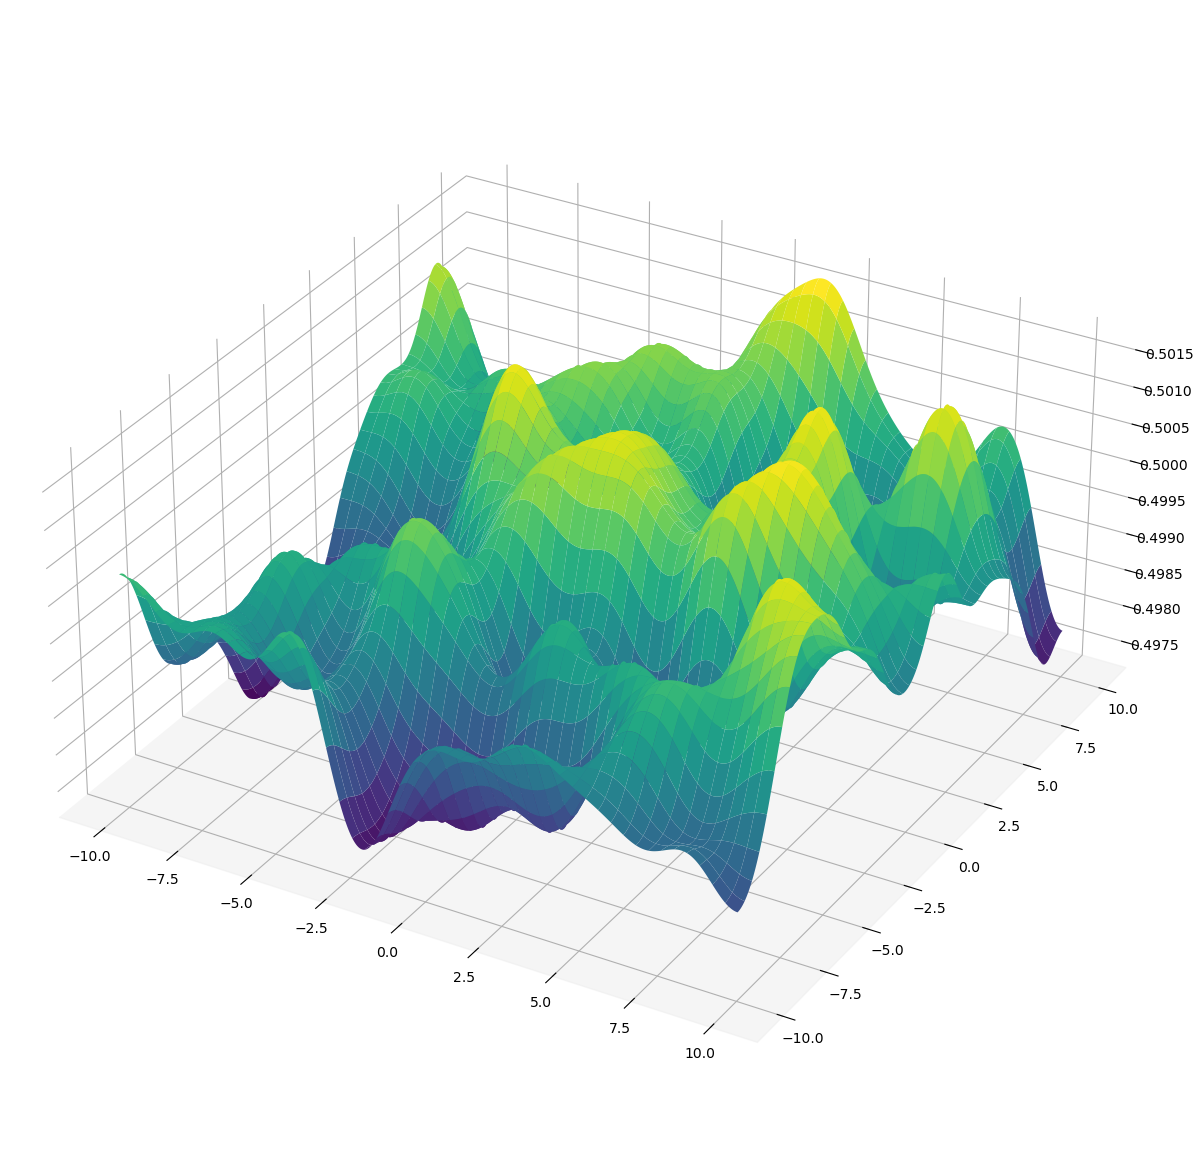

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting
from scipy.ndimage import gaussian_filter  # For smoothing the noise

# Create a grid of x and y values
x = np.linspace(-10, 10, 2000)
y = np.linspace(-10, 10, 2000)
X, Y = np.meshgrid(x, y)

# Generate a random landscape and smooth it with a higher sigma for less noise.
Z = np.random.rand(*X.shape)
Z = gaussian_filter(Z, sigma=100)  # Increase sigma for more smoothing

# Create a wider figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface without edge lines
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# gridvals = np.zeros((2000,2000))
# grid = ax.plot_wireframe(X, Y, gridvals, color='gray', rstride=100, cstride=100)

# Remove axis ticks for a clean image
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

# Remove the axis panes and grid for an uncluttered look
ax.xaxis.pane.set_visible(False)
ax.yaxis.pane.set_visible(False)
ax.zaxis.pane.set_visible(True)
ax.grid(True)

# Remove the remaining frame elements by turning off the axis lines.
ax.w_xaxis.line.set_lw(0.)
ax.w_yaxis.line.set_lw(0.)
ax.w_zaxis.line.set_lw(0.)
ax.set_frame_on(False)

ax.set_box_aspect([1,1,.5])

# Display the plot
plt.show()


In [85]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

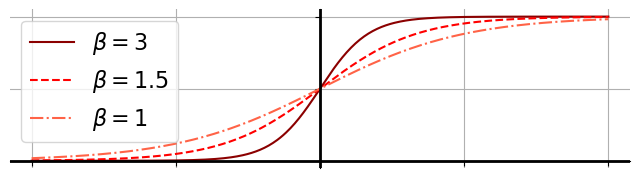

In [107]:
import numpy as np
import matplotlib.pyplot as plt

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16#,
#    'text.usetex': True#,
#    'figure.figsize': [8., 4.5]
   }
plt.rcParams.update(params)

# Create an array of I values from -2 to 2
I = np.linspace(-2, 2, 400)


# Compute the hyperbolic tangent of I
tanh_I1 = 0.5+0.5*np.tanh(3*I)
tanh_I2 = 0.5+0.5*np.tanh(1.5*I)
tanh_I3 = 0.5+0.5*np.tanh(1*I)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(I, tanh_I1, color='darkred',label=r"$\beta =3$")
ax.plot(I, tanh_I2, color='red',linestyle='--',label=r"$\beta =1.5$")
ax.plot(I, tanh_I3, color='tomato',linestyle='-.',label=r"$\beta =1$")

ax.set_xlim([-2.15,2.15])
ax.set_ylim([-0.05,1.05])

ax.set_aspect(1)
# ax.axis('off')
ax.grid(True)

ax.axvline(linewidth = 2, color='black')
ax.axhline(linewidth = 2, color='black')

# Remove axis ticks
ax.set_xticks([-2,-1,1,2])
ax.set_yticks([0.5,1])
#Remove tick labels
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

plt.legend()
# Remove the default spines and set new axes at the center
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Show the plot
plt.show()


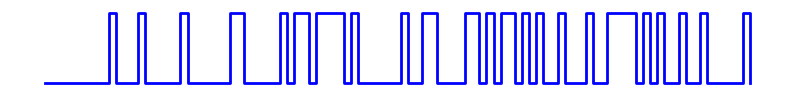

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Number of time points
n = 100
t = np.linspace(0, 10, n)

# Generate biased random values: 80% chance of 1 and 20% chance of 0,
# using a threshold with the Heaviside function.
threshold = 0.70
rand_vals = np.random.rand(n)
wave = np.heaviside(rand_vals - threshold, 1)

# Create the plot using a step function for instantaneous transitions.
fig, ax = plt.subplots(figsize=(10, 4))
ax.step(t, wave, where='post', color='blue', linewidth=2)

# Remove the vertical axis
ax.spines['left'].set_color('none')
ax.yaxis.set_ticks([])

# Remove top and right spines for a clean look.
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Place the horizontal axis at y=0.
# ax.spines['bottom'].set_position(('data', 0))
# ax.xaxis.set_ticks_position('bottom')
# ax.set_xlabel('Time')

ax.set_aspect(1)
ax.axis('off')

plt.show()



In [34]:
!cuda--version

'cuda--version' is not recognized as an internal or external command,
operable program or batch file.


## AND data:

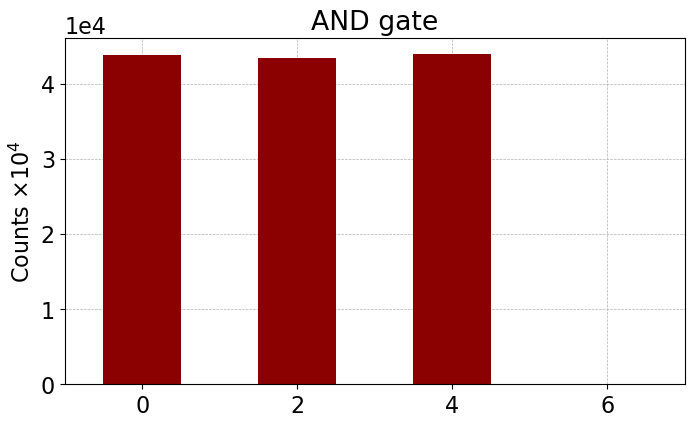

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16,
   'text.usetex': False,
   'figure.figsize': [8., 4.5]
   }
plt.rcParams.update(params)

# Read the CSV file (assuming the file is named 'data.csv' and has no header)
df = pd.read_csv('3-19-25_120MHz_ANDdata.csv')#, header=None)

# Extract the first column and convert it to a NumPy array
first_column = df.iloc[:, 0].to_numpy()
ANDdata = np.zeros_like(first_column)
for i in range(len(first_column)):
    ANDdata[i] = 2**2*(int(bool(2**1 & first_column[i])))+2**1*(int(bool(2**0 & first_column[i])))+2**0*(int(bool(int(bool(2**0 & first_column[i]))&int(bool(2**1 & first_column[i])))))

# Plot a histogram of the first column data
plt.hist(ANDdata, bins=range(int(2**4+1)), edgecolor='none', color = 'darkred', rwidth=1, align='left',zorder=2)  # You can adjust the number of bins as needed
# plt.xlabel('Value')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.xticks([0,2,4,6])
plt.grid(True)
plt.grid(linestyle='--', linewidth=0.5,zorder=1)
plt.xlim([-1,7])
plt.ylabel(r'Counts $\times 10^4$')
plt.title('AND gate')
plt.show()

# labels, counts = np.unique(ANDdata, return_counts=True)
# plt.bar(labels, counts, align='center')
# plt.gca().set_xticks(labels)
# plt.show()

P(allowed) =  10686474581524.463

P(unallowed) =  4.5399929762484854e-05
Normalized P(allowed) =  0.3333333333333333

Normalized P(unallowed) =  1.4161180850971963e-18


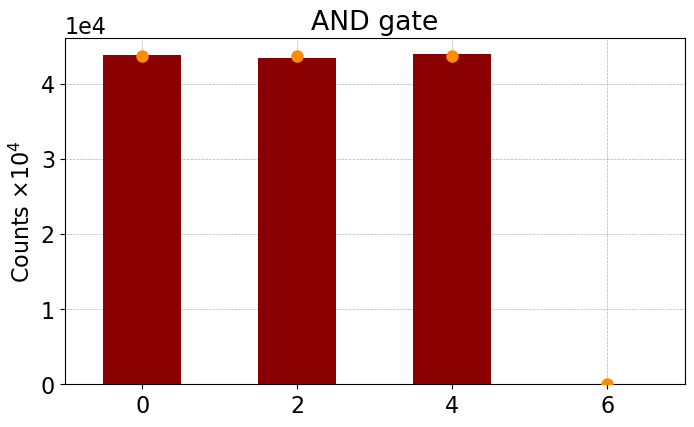

In [43]:
import numpy as np

# Add boltzmann probabilities to the histogram:
def J_AND(size,input1,input2,output):
    blank = np.zeros((size,size))
    blank[input1,input2] = blank[input2,input1] = -1
    blank[input1,output] = blank[input2,output] = 2
    blank[output,input1] = blank[output,input2] = 2
    return blank
def h_AND(size,input1,input2,output):
    blank = np.zeros(size)
    blank[input1]=blank[input2]=1
    blank[output]=-2
    return blank

size=3

j = J_AND(size,0,1,2)
h = h_AND(size,0,1,2)

beta =  10#1.717 for AND5

E_allowed = 0
arr=np.array([-1,-1,-1]) #ABC=000
E_weight = 0
E_bias = 0
for r in range(3):
    ccc = r+1
    E_bias-=arr[r]*h[r]
    for c in range(ccc,size):
        E_weight -= arr[r]*arr[c]*j[r][c]
E_allowed = E_weight+E_bias
prob_allowed = np.exp(-beta*E_allowed)

E_unallowed = 0
arr=np.array([1,1,-1]) #ABC=000
E_weight = 0
E_bias = 0
for r in range(3):
    ccc = r+1
    E_bias-=arr[r]*h[r]
    for c in range(ccc,size):
        E_weight -= arr[r]*arr[c]*j[r][c]
E_unallowed = E_weight+E_bias
prob_unallowed = np.exp(-beta*E_unallowed)

print("P(allowed) = ",prob_allowed)
print("\nP(unallowed) = ", prob_unallowed)
P_total = 3*prob_allowed+prob_unallowed
P_a = prob_allowed/P_total
P_u = prob_unallowed/P_total

print("Normalized P(allowed) = ",P_a)
print("\nNormalized P(unallowed) = ", P_u)

states = np.array([0,2,4,6])
probabilities = np.array([P_a,P_a,P_a,P_u])
counts = (probabilities*131072).astype(int)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16,
   'text.usetex': False,
   'figure.figsize': [8., 4.5]
   }
plt.rcParams.update(params)

# Read the CSV file (assuming the file is named 'data.csv' and has no header)
df = pd.read_csv('3-19-25_120MHz_ANDdata.csv')#, header=None)

# Extract the first column and convert it to a NumPy array
first_column = df.iloc[:, 0].to_numpy()
ANDdata = np.zeros_like(first_column)
for i in range(len(first_column)):
    ANDdata[i] = 2**2*(int(bool(2**1 & first_column[i])))+2**1*(int(bool(2**0 & first_column[i])))+2**0*(int(bool(int(bool(2**0 & first_column[i]))&int(bool(2**1 & first_column[i])))))

# Plot a histogram of the first column data
plt.hist(ANDdata, bins=range(int(2**4+1)), edgecolor='none', color = 'darkred', rwidth=1, align='left',zorder=2)  # You can adjust the number of bins as needed
plt.plot(states, counts, 'o',color='darkorange', markersize=8,zorder=3)# plt.xlabel('Value')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.xticks([0,2,4,6])
plt.grid(True)
plt.grid(linestyle='--', linewidth=0.5,zorder=1)
plt.xlim([-1,7])
plt.ylabel(r'Counts $\times 10^4$')
plt.title('AND gate')
plt.show()


In [16]:
E_unallowed


1.0

## FA data:

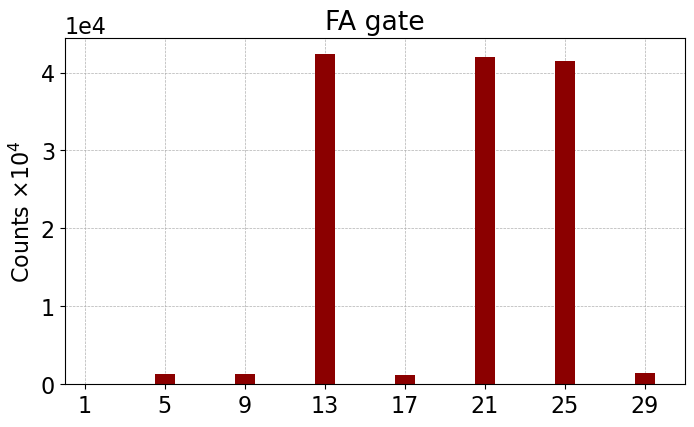

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16,
   'text.usetex': False,
   'figure.figsize': [8., 4.5]
   }
plt.rcParams.update(params)

# Read the CSV file (assuming the file is named 'data.csv' and has no header)
df = pd.read_csv('3-30-25_FA_AND5_350MHz.csv', header=None)

# Extract the first column and convert it to a NumPy array
first_column = df.iloc[:, 0].to_numpy()
FAdata = np.zeros_like(first_column)
for i in range(len(first_column)):
    FAdata[i] = 2**4*(int(bool(2**4 & first_column[i])))+2**3*(int(bool(2**3 & first_column[i])))+2**2*(int(bool(2**2 & first_column[i])))+2**1*(int(bool(2**1 & first_column[i])))+2**0*(int(bool(2**0 & first_column[i])))

# Plot a histogram of the first column data
plt.hist(FAdata, bins=range(int(2**6)), edgecolor='none', color = 'darkred',rwidth=5, align='left',zorder=2)  # You can adjust the number of bins as needed
# plt.xlabel('Value')
plt.xlim([0,31])
plt.grid(True)
plt.grid(linestyle='--', linewidth=0.5,zorder=1)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.xticks([1,5,9,13,17,21,25,29])
plt.ylabel(r'Counts $\times 10^4$')
plt.title('FA gate')
plt.show()


P(allowed) =  961.0245932942317

P(unallowed1) =  31.000396663498222

P(unallowed2) =  0.0010405560970840164
Normalized P(allowed) =  0.319587686906613

Normalized P(unallowed1) =  0.010309148311089684

Normalized P(unallowed2) =  3.460358022927714e-07


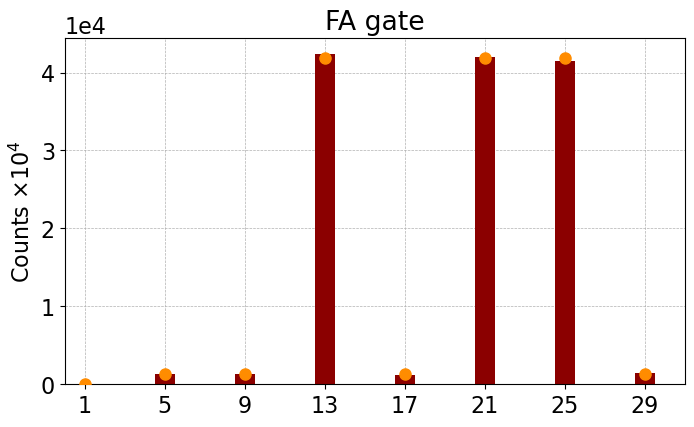

In [57]:
# Add boltzmann probabilities to the histogram:
#Full adder:
def J_FA(size, in1, in2, Cin, Cout, S):
    blank = np.zeros((size,size))
    blank[in1,in2]=blank[in2,in1]=blank[in1,Cin]=blank[Cin,in1]=blank[in2,Cin]=blank[Cin,in2]=-1
    blank[Cout,in1]=blank[in1,Cout]=blank[Cout,in2]=blank[in2,Cout]=blank[Cin,Cout]=blank[Cout,Cin]=2
    blank[S,in1]=blank[in1,S]=blank[S,in2]=blank[in2,S]=blank[S,Cin]=blank[Cin,S]=1
    blank[Cout,S]=blank[S,Cout]=-2
    return blank
def h_FA(size, in1, in2, Cin, Cout, S):
    blank = np.zeros(size)
    return blank

size=5

j = J_FA(size,0,1,2,4,3)
h = h_FA(size,0,1,2,4,3)

beta =  1.717 #for AND5

E_allowed = 0
arr=np.array([1,-1,1,-1,1]) #A B C_in S C_out = 10101
E_weight = 0
E_bias = 0
for r in range(size):
    ccc = r+1
    E_bias-=arr[r]*h[r]
    for c in range(ccc,size):
        E_weight -= arr[r]*arr[c]*j[r][c]
E_allowed = E_weight+E_bias
prob_allowed = np.exp(-beta*E_allowed)

E_unallowed1 = 0
arr=np.array([-1,1,-1,-1,1]) #A B C_in S C_out = 01001
E_weight = 0
E_bias = 0
for r in range(size):
    ccc = r+1
    E_bias-=arr[r]*h[r]
    for c in range(ccc,size):
        E_weight -= arr[r]*arr[c]*j[r][c]
E_unallowed1 = E_weight+E_bias
prob_unallowed1 = np.exp(-beta*E_unallowed1)

E_unallowed2 = 0
arr=np.array([-1,-1,-1,-1,1]) #A B C_in S C_out = 00001
E_weight = 0
E_bias = 0
for r in range(size):
    ccc = r+1
    E_bias-=arr[r]*h[r]
    for c in range(ccc,size):
        E_weight -= arr[r]*arr[c]*j[r][c]
E_unallowed2 = E_weight+E_bias
prob_unallowed2 = np.exp(-beta*E_unallowed2)

print("P(allowed) = ",prob_allowed)
print("\nP(unallowed1) = ", prob_unallowed1)
print("\nP(unallowed2) = ", prob_unallowed2)

# prob_sum=0
# for i in range(int(2**5)):
#     A = int(bool(i&int(2**4)))
#     B = int(bool(i&int(2**3)))
#     Cin = int(bool(i&int(2**2)))
#     S = int(bool(i&int(2**1)))
#     Cout = int(bool(i&int(2**0)))
#     E = 0
#     arr=np.array([(2*A-1),(2*B-1),(2*Cin-1),(2*S-1),(2*Cout-1)])
#     E_weight = 0
#     E_bias = 0
#     for r in range(3):
#         ccc = r+1
#         E_bias-=arr[r]*h[r]
#         for c in range(ccc,size):
#             E_weight -= arr[r]*arr[c]*j[r][c]
#     E = E_weight+E_bias
#     prob_sum += np.exp(-beta*E)
# P_total = prob_sum

P_total = 3*prob_allowed+4*prob_unallowed1+prob_unallowed2

P_a = prob_allowed/P_total
P_u1 = prob_unallowed1/P_total
P_u2 = prob_unallowed2/P_total

print("Normalized P(allowed) = ",P_a)
print("\nNormalized P(unallowed1) = ", P_u1)
print("\nNormalized P(unallowed2) = ", P_u2)

states = np.array([1,5,9,13,17,21,25,29])
probabilities = np.array([P_u2,P_u1,P_u1,P_a,P_u1,P_a,P_a,P_u1])
counts = (probabilities*131072).astype(int)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16,
   'text.usetex': False,
   'figure.figsize': [8., 4.5]
   }
plt.rcParams.update(params)

# Read the CSV file (assuming the file is named 'data.csv' and has no header)
df = pd.read_csv('3-30-25_FA_AND5_350MHz.csv', header=None)

# Extract the first column and convert it to a NumPy array
first_column = df.iloc[:, 0].to_numpy()
FAdata = np.zeros_like(first_column)
for i in range(len(first_column)):
    FAdata[i] = 2**4*(int(bool(2**4 & first_column[i])))+2**3*(int(bool(2**3 & first_column[i])))+2**2*(int(bool(2**2 & first_column[i])))+2**1*(int(bool(2**1 & first_column[i])))+2**0*(int(bool(2**0 & first_column[i])))

# Plot a histogram of the first column data
plt.hist(FAdata, bins=range(int(2**6)), edgecolor='none', color = 'darkred',rwidth=5, align='left',zorder=2)  # You can adjust the number of bins as needed
plt.plot(states, counts, 'o',color='darkorange', markersize=8,zorder=3)# plt.xlabel('Value')
# plt.xlabel('Value')
plt.xlim([0,31])
plt.grid(True)
plt.grid(linestyle='--', linewidth=0.5,zorder=1)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.xticks([1,5,9,13,17,21,25,29])
plt.ylabel(r'Counts $\times 10^4$')
plt.title('FA gate')
plt.show()


## 3x3 mult data:

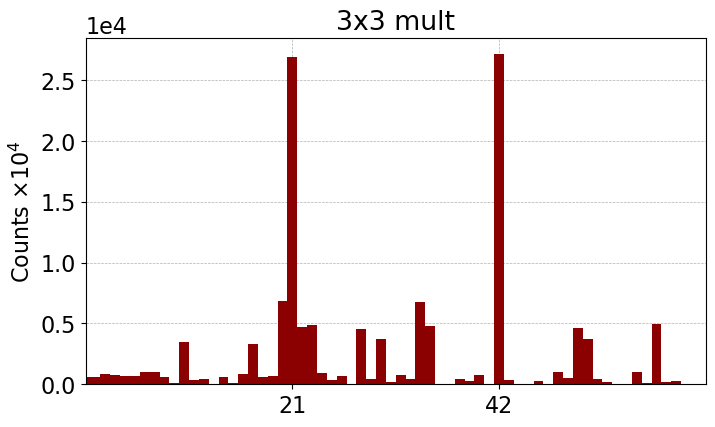

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16,
   'text.usetex': False,
   'figure.figsize': [8., 4.5]
   }
plt.rcParams.update(params)

# Read the CSV file (assuming the file is named 'data.csv' and has no header)
df = pd.read_csv('3-3-25_3x3mult_40MHz_5kstepsRepeat_AND5.csv', header=None)

# Extract the first column and convert it to a NumPy array
multData = df.iloc[:, 0].to_numpy()
# FAdata = np.zeros_like(first_column)
# for i in range(len(first_column)):
#     FAdata[i] = 2**4*(int(bool(2**4 & first_column[i])))+2**3*(int(bool(2**3 & first_column[i])))+2**2*(int(bool(2**2 & first_column[i])))+2**1*(int(bool(2**1 & first_column[i])))+2**0*(int(bool(2**0 & first_column[i])))

# Plot a histogram of the first column data
plt.hist(multData, bins=range(int(2**7)), edgecolor='none', color = 'darkred',rwidth=5, align='left',zorder=2)  # You can adjust the number of bins as needed
# plt.xlabel('Value')
plt.xlim([0,63])
plt.grid(True)
plt.grid(linestyle='--', linewidth=0.5,zorder=1)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.xticks([21,42])
plt.ylabel(r'Counts $\times 10^4$')
plt.title('3x3 mult')
plt.show()


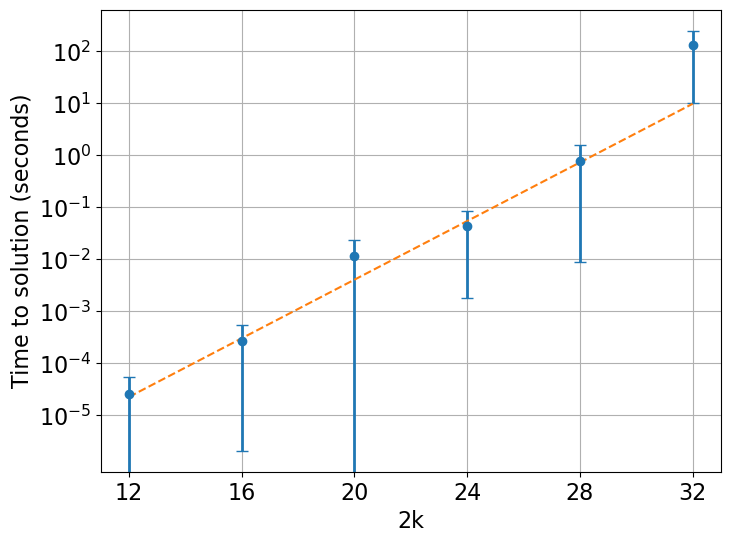

Fit parameters:
a = 0.000000009382 ± 0.000000010157
b = 1.541794764486 ± 0.119969780584


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16,
   'text.usetex': False,
   'figure.figsize': [8., 4.5]
   }
plt.rcParams.update(params)


sizes = np.array([32,28,24,20,16,12])#,30,31,32])
# TTS = np.array([.00002629, 0.000231, 0.002144, 0.007274,0.009903,0.2155,0.3983,360])#, , ,])
# TTS_errors = np.array([.00003185, 0.000263, .002094, 0.007322, 0.01021,0.2051,0.3847, 320])#, 4, 8])

data16x16 = np.array([54.4457,472.1463,302.3678,2.6367,80.9978,158.7974,34.4512,22.6815,47.1423,105.8735])
stddevs16x16 = np.array([70.1203,441.4486,224.1505,2.6743,84.9023,146.0329,33.1897,22.5281,46.2488,110.8204])
data14x14 = np.array([0.1208,0.2739,0.6571,0.7097,2.2177,1.6127,0.06917,1.5227,0.4560,0.1361])
stddevs14x14 = np.array([0.1170,0.2737,0.6283,0.6939,2.2005,1.6353,0.06848,1.4700,0.4622,0.1380])
data12x12 = np.array([0.006355,0.03387,0.01159,0.06495,0.1534,0.01137,0.04933,0.02284,0.04828,0.03513])
stddevs12x12 = np.array([0.006149,0.03277,0.01188,0.06263,0.1397,0.01113,0.05079,0.02408,0.04560,0.03419])
data10x10 = np.array([0.01003,0.002047,0.003067,0.04035,0.009035,0.006820,0.002803,0.02091,0.007916,0.01149])
stddevs10x10 = np.array([0.01026,0.001980,0.003010,0.04512,0.009006,0.007260,0.002906,0.02113,0.007458,0.01128])
data8x8 = np.array([0.0002267,0.0001274,0.0003599,0.0002677,0.0001532,0.0002947,0.0003103,0.0004334,0.0002668,0.0002401])
stddevs8x8 = np.array([0.0002224,0.0001194,0.0003451,0.0002733,0.0001376,0.0002975,0.0003243,0.0004454,0.0002661,0.0002283])
data6x6 = np.array([0.00001412,0.00002552,0.00002875,0.00002065,0.00002345,0.00002275,0.00002259,0.00002919,0.00003383,0.00003814])
stddevs6x6 = np.array([0.00001651,0.00003054,0.00003150,0.00002182,0.00002522,0.00002234,0.00002302,0.00002950,0.00003325,0.00003980])

avg16x16 = np.average(data16x16)
err16x16 = np.average(stddevs16x16)
avg14x14 = np.average(data14x14)
err14x14 = np.average(stddevs14x14)
avg12x12 = np.average(data12x12)
err12x12 = np.average(stddevs12x12)
avg10x10 = np.average(data10x10)
err10x10 = np.average(stddevs10x10)
avg8x8 = np.average(data8x8)
err8x8 = np.average(stddevs8x8)
avg6x6 = np.average(data6x6)
err6x6 = np.average(stddevs6x6)

TTS = np.array([avg16x16,avg14x14,avg12x12,avg10x10,avg8x8,avg6x6])
TTS_errors = np.array([err16x16,err14x14,err12x12,err10x10,err8x8,err6x6])
# If we transform to a log plot (y axis from 10^y -> y):
# TTS_errors = (TTS_errors)*0.4343/TTS

# Define the function to fit (linear in log space for exponential fit)
def func(x, a, b):
    return a*np.exp(x/b)#a*b**x

# Fit the curve to the data
popt, pcov = curve_fit(func, sizes,TTS, sigma=TTS_errors, p0=([0.001,100]),maxfev=10000, bounds=([-1,1],[np.inf,np.inf]))
a, b = popt
a_error, b_error = np.sqrt(np.diag(pcov))

# Generate points for the fitted curve
size_fit = np.linspace(min(sizes), max(sizes), 100)
TTS_fit = func(size_fit, a, b)

# Create the log plot with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(sizes, TTS, yerr=TTS_errors, fmt='o',capsize=4,elinewidth=2)
plt.plot(size_fit, TTS_fit, '--') #, label=f'Fit: y = {a:.2f} * {b:.2f}^x'



# Set the y-axis to logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel('2k')
plt.ylabel('Time to solution (seconds)')
# plt.title('Multipliers, AND4 noise')
# plt.legend()
plt.grid(True)

plt.yticks([10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2)])#0.00001,0.0001,0.001,0.01,0.1,0,1,10,100])#[1e-5,1e-4,1e-3,1e-2,1e-1,0,1e1,1e2])
plt.xticks([12,16,20,24,28,32])

# Show the plot
plt.show()

# Display the fitting parameters with errors
print("Fit parameters:")
print(f"a = {a:.12f} ± {a_error:.12f}")
print(f"b = {b:.12f} ± {b_error:.12f}")


## Let's see if this just scales like a brute force search:
- Brute force: Would expect to get a solution in 1/2 the total number of bit combinations. 2^2k total combinations, expect half that, so 2^(2k-1)
- **I originally also included a brute factor search - this requires a mod division which is more expensive, so there isn't a 1:1 comparison to our method (which has a multiply in the oracle)**

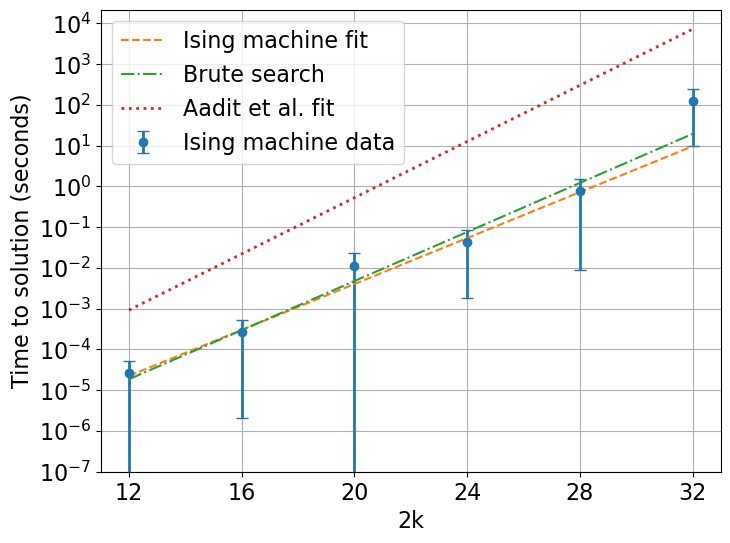

Fit parameters:
a = 0.000000009382 ± 0.000000010156
b = 1.541793142110 ± 0.119969621014
e = 0.000000004545
f = 1.442695040889


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16,
   'text.usetex': False,
   'figure.figsize': [8., 4.5]
   }
plt.rcParams.update(params)


sizes = np.array([32,28,24,20,16,12],dtype=np.int64)#,30,31,32])
# TTS = np.array([.00002629, 0.000231, 0.002144, 0.007274,0.009903,0.2155,0.3983,360])#, , ,])
# TTS_errors = np.array([.00003185, 0.000263, .002094, 0.007322, 0.01021,0.2051,0.3847, 320])#, 4, 8])

data16x16 = np.array([54.4457,472.1463,302.3678,2.6367,80.9978,158.7974,34.4512,22.6815,47.1423,105.8735])
stddevs16x16 = np.array([70.1203,441.4486,224.1505,2.6743,84.9023,146.0329,33.1897,22.5281,46.2488,110.8204])
data14x14 = np.array([0.1208,0.2739,0.6571,0.7097,2.2177,1.6127,0.06917,1.5227,0.4560,0.1361])
stddevs14x14 = np.array([0.1170,0.2737,0.6283,0.6939,2.2005,1.6353,0.06848,1.4700,0.4622,0.1380])
data12x12 = np.array([0.006355,0.03387,0.01159,0.06495,0.1534,0.01137,0.04933,0.02284,0.04828,0.03513])
stddevs12x12 = np.array([0.006149,0.03277,0.01188,0.06263,0.1397,0.01113,0.05079,0.02408,0.04560,0.03419])
data10x10 = np.array([0.01003,0.002047,0.003067,0.04035,0.009035,0.006820,0.002803,0.02091,0.007916,0.01149])
stddevs10x10 = np.array([0.01026,0.001980,0.003010,0.04512,0.009006,0.007260,0.002906,0.02113,0.007458,0.01128])
data8x8 = np.array([0.0002267,0.0001274,0.0003599,0.0002677,0.0001532,0.0002947,0.0003103,0.0004334,0.0002668,0.0002401])
stddevs8x8 = np.array([0.0002224,0.0001194,0.0003451,0.0002733,0.0001376,0.0002975,0.0003243,0.0004454,0.0002661,0.0002283])
data6x6 = np.array([0.00001412,0.00002552,0.00002875,0.00002065,0.00002345,0.00002275,0.00002259,0.00002919,0.00003383,0.00003814])
stddevs6x6 = np.array([0.00001651,0.00003054,0.00003150,0.00002182,0.00002522,0.00002234,0.00002302,0.00002950,0.00003325,0.00003980])

avg16x16 = np.average(data16x16)
err16x16 = np.average(stddevs16x16)
avg14x14 = np.average(data14x14)
err14x14 = np.average(stddevs14x14)
avg12x12 = np.average(data12x12)
err12x12 = np.average(stddevs12x12)
avg10x10 = np.average(data10x10)
err10x10 = np.average(stddevs10x10)
avg8x8 = np.average(data8x8)
err8x8 = np.average(stddevs8x8)
avg6x6 = np.average(data6x6)
err6x6 = np.average(stddevs6x6)

TTS = np.array([avg16x16,avg14x14,avg12x12,avg10x10,avg8x8,avg6x6])
TTS_errors = np.array([err16x16,err14x14,err12x12,err10x10,err8x8,err6x6])
# If we transform to a log plot (y axis from 10^y -> y):
# TTS_errors = (TTS_errors)*0.4343/TTS

# Define the function to fit (linear in log space for exponential fit)
def func(x, a, b):
    return a*np.exp(x/b)#a*b**x

# Fit the curve to the data
popt, pcov = curve_fit(func, sizes,TTS, sigma=TTS_errors, p0=([0.000000001,1]),maxfev=100000,bounds=(0,[0.0001,2]))
a, b = popt
a_error, b_error = np.sqrt(np.diag(pcov))

# Generate points for the fitted curve
size_fit = np.linspace(min(sizes), max(sizes), 100)
TTS_fit = func(size_fit, a, b)

# Brute1 = (2**((sizes/2)-1))/110E6 #Technically should only have to search through (on average) half the possible factors
Brute2 = (2**(sizes-1))/110E6  #Search through half of all possible products
# Fit the curve to the data
# popt1, pcov1 = curve_fit(func, sizes,Brute1, p0=([0.00000001,2]),maxfev=100000,bounds=(0,[0.001,3]))
# c, d = popt1
# Brute1_fit = func(size_fit,c,d)
popt2, pcov2 = curve_fit(func, sizes,Brute2, p0=([0.000000000001,1]),maxfev=100000,bounds=(0,[0.001,3]))
e, f = popt2
Brute2_fit = func(size_fit,e,f)

def GNFS()
    return np.exp(1.9229994)

# Create the log plot with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(sizes, TTS, yerr=TTS_errors, fmt='o',capsize=4,elinewidth=2,label='Ising machine data')
plt.plot(size_fit, TTS_fit, '--',label='Ising machine fit') #, label=f'Fit: y = {a:.2f} * {b:.2f}^x'
# plt.scatter(sizes,Brute1, label='Factor search')
# plt.plot(size_fit,Brute1_fit, '-.',label='Factor search fit')
# plt.scatter(sizes,Brute2, label='Product search')
plt.plot(size_fit,Brute2_fit, '-.',label='Brute search')
plt.plot(size_fit,func(size_fit,10**(-7.17),1.26),linestyle=':',linewidth=2,label='Aadit et al. fit')

plt.legend()

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel('2k')
plt.ylabel('Time to solution (seconds)')
# plt.title('Multipliers, AND4 noise')
# plt.legend()
plt.grid(True)

plt.yticks([10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4)])#0.00001,0.0001,0.001,0.01,0.1,0,1,10,100])#[1e-5,1e-4,1e-3,1e-2,1e-1,0,1e1,1e2])
plt.xticks([12,16,20,24,28,32])

# Show the plot
plt.show()

# Display the fitting parameters with errors
print("Fit parameters:")
print(f"a = {a:.12f} ± {a_error:.12f}")
print(f"b = {b:.12f} ± {b_error:.12f}")
# print(f"c = {c:.12f}")
# print(f"d = {d:.12f}")
print(f"e = {e:.12f}")
print(f"f = {f:.12f}")

In [20]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

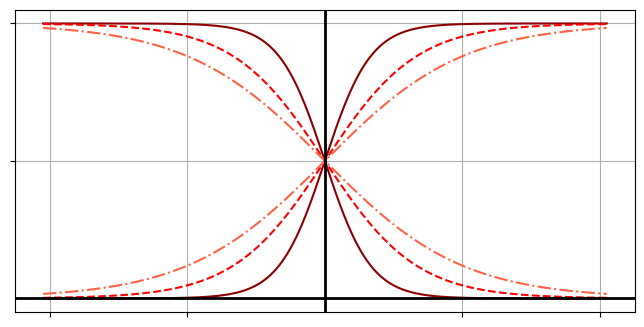

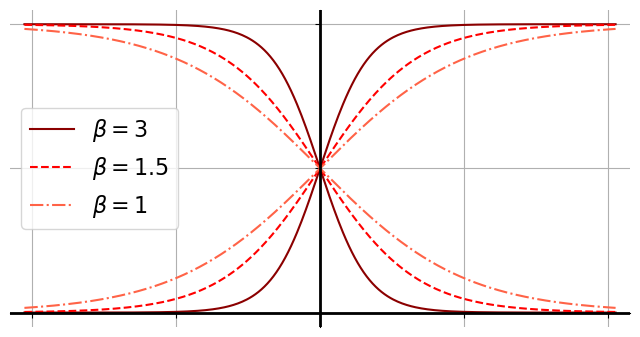

In [118]:
import numpy as np
import matplotlib.pyplot as plt

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16#,
#    'text.usetex': True#,
#    'figure.figsize': [8., 4.5]
   }
plt.rcParams.update(params)

# Create an array of I values from -2 to 2
I = np.linspace(-2.05, 2.05, 400)

# Compute the hyperbolic tangent of I
tanh_I1 = 0.5*(1+np.tanh(3*I))
tanh_I2 = 0.5*(1+np.tanh(1.5*I))
tanh_I3 = 0.5*(1+np.tanh(1*I))
tanh_I4 = 0.5*(1+np.tanh(-3*I))
tanh_I5 = 0.5*(1+np.tanh(-1.5*I))
tanh_I6 = 0.5*(1+np.tanh(-1*I))

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(I, tanh_I1, color='black',label=r"$\beta =3$")
# ax.plot(I, tanh_I2, color='dimgrey',label=r"$\beta =1.5$")
# ax.plot(I, tanh_I3, color='darkgrey',label=r"$\beta =1$")
ax.plot(I, tanh_I1, color='darkred',label=r"$\beta =3$")
ax.plot(I, tanh_I2, color='red',linestyle='--',label=r"$\beta =1.5$")
ax.plot(I, tanh_I3, color='tomato',linestyle = '-.',label=r"$\beta =1$")
ax.plot(I, tanh_I4, color='darkred')
ax.plot(I, tanh_I5, color='red',linestyle='--')
ax.plot(I, tanh_I6, color='tomato',linestyle='-.')

ax.set_aspect(2)
# ax.axis('off')
ax.grid(True)
ax.axvline(linewidth = 2, color='black')
ax.axhline(linewidth = 2, color='black')

# Remove axis ticks
ax.set_xticks([-2,-1,1,2])
ax.set_yticks([0.5,1])
#Remove tick labels
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
ax.legend(loc='center left')
ax.set_xlim([-2.15,2.15])
ax.set_ylim([-0.05,1.05])

# Remove the default spines and set new axes at the center
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Show the plot
plt.show()